## <Center>本节课知识点提炼</Center>

<!--  -->

### 本节课重点与难点
* 重点：SIFT特征 BoW
* 难点：BoW

* SIFT特征(尺度不变特征变换)  
该算法用来侦测与描述影像中的局部性特征，在空间尺度中寻找极值点，并提取出其位置、尺度、旋转不变量。该算法具有非常强的稳健性。SIFT特征的信息量大，适合在海量数据库中快速准确匹配。  
SIFT算法的特点有：  

    1. SIFT特征是图像的局部特征，其对旋转、尺度缩放、亮度变化保持不变性，对视角变化、仿射变换、噪声也保持一定程度的稳定性；

    2. 独特性（Distinctiveness）好，信息量丰富，适用于在海量特征数据库中进行快速、准确的匹配；

    3. 多量性，即使少数的几个物体也可以产生大量的SIFT特征向量；

    4. 高速性，经优化的SIFT匹配算法甚至可以达到实时的要求；

    5. 可扩展性，可以很方便的与其他形式的特征向量进行联合。   
    
 SIFT算法可以解决的问题：  
 
    1. 目标的旋转、缩放、平移（RST）

    2. 图像仿射/投影变换（视点viewpoint）

    3. 光照影响（illumination）

    4. 目标遮挡（occlusion）

    5. 杂物场景（clutter）

    6. 噪声

  SIFT算法的实质是在不同的尺度空间上查找关键点(特征点)，并计算出关键点的方向。SIFT所查找到的关键点是一些十分突出，不会因光照，仿射变换和噪音等因素而变化的点，如角点、边缘点、暗区的亮点及亮区的暗点等。 

   SIFT算法分解为如下四步：

    1. 尺度空间极值检测：搜索所有尺度上的图像位置。通过高斯微分函数来识别潜在的对于尺度和旋转不变的兴趣点。

    2. 关键点定位：在每个候选的位置上，通过一个拟合精细的模型来确定位置和尺度。关键点的选择依据于它们的稳定程度。

    3. 方向确定：基于图像局部的梯度方向，分配给每个关键点位置一个或多个方向。所有后面的对图像数据的操作都相对于关键点的方向、尺度和位置进行变换，从而提供对于这些变换的不变性。

    4. 关键点描述：在每个关键点周围的邻域内，在选定的尺度上测量图像局部的梯度。这些梯度被变换成一种表示，这种表示允许比较大的局部形状的变形和光照变化。


* SIFT Matching    
dst1: first nearst point      
dst2: second nearst point    
dst1/dst2<0.8:  即对于图像image1中的某个SIFT特征点point1，通过在image2图像上所有SIFT关键点查找到与point1最近的SIFT关键点point21(记该关键点point21到point1的距离为dst1)和次近的关键点point22(记该关键点point22到point1的距离为dst2)，如果dst1/dst2<0.8，则我们将其视为正确匹配的点对，否则则为错配的点对予以剔除。这种寻找匹配的方法，由Lowe在其Distinctive image features from scale-invariant keypoints中有说明，阈值0.8是可以调整的，论文中采用的是0.8。下面是采用该方法进行匹配后的结果：

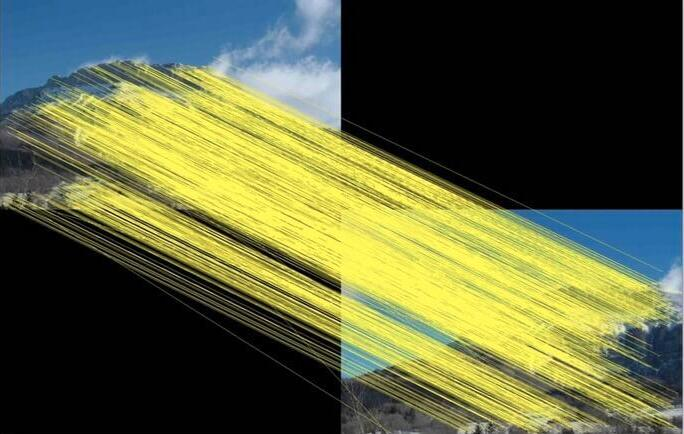

    可以看到上图仍有匹配错误的点， 加入RANSAC算法后的效果如下：

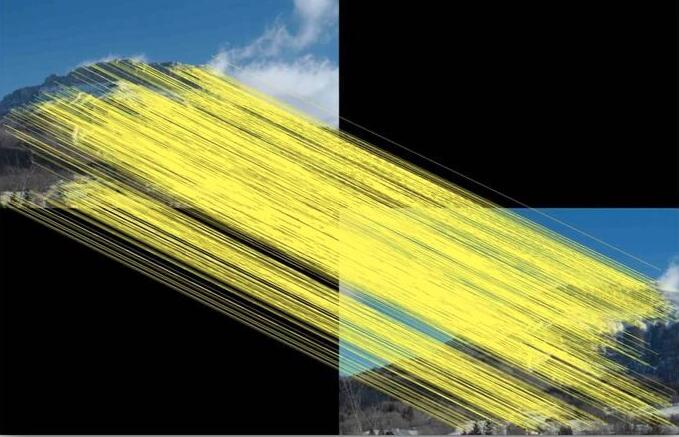

     可以看到，已经完全没有错配点了，从这一点来说，其效果是非常好的。不过，从正配点对数目来看，"dst1/dst2<0.8+RANSAC" 方法的正配点对要稍微少些。在大多数情况下，我们会选择完全剔除了错配点对的模型。

* BoW模型描述图像   
SIFT特征虽然也能描述一幅图像，但是每个SIFT矢量都是128维的，而且一幅图像通常都包含成百上千个SIFT矢量，在进行相似度计算时，这个计算量是非常大的，通行的做法是用聚类算法对这些矢量数据进行聚类，然后用聚类中的一个簇代表BoW中的一个视觉词，将同一幅图像的SIFT矢量映射到视觉词序列生成码本，这样每一幅图像只用一个码本矢量来描述，这样计算相似度时效率就大大提高了。

* BoW 实践

    sift已经被申请专利了，所以，在opencv3.4.3.16 版本后，这个功能就不能用了.

    把版本退回到3.4.3以前：
    pip install opencv-python==3.4.2.16
    pip install opencv-contrib-python==3.4.2.16

课件中提到的数据集[Oxford-5K下载链接](http://www.robots.ox.ac.uk/~vgg/data/oxbuildings/)    

下面代码用的数据集Cifar10:  [Cifar10数据集链接](http://www.cs.toronto.edu/~kriz/cifar.html)  点击下载cifar-10-batches-py并用下列代码将二进制图片转换为JPG格式

In [12]:
import numpy as np
from skimage.io import imsave

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

filename = './cifar/cifar-10-batches-py'

meta = unpickle(filename+'/batches.meta')
label_name = meta[b'label_names']

for i in range(1,6):
    content = unpickle(filename+'/data_batch_'+str(i))
    print('load data...')
    print(content.keys())
    print('tranfering data_batch' + str(i))
    for j in range(10000):
        img = content[b'data'][j]
        img = img.reshape(3,32,32)
        img = img.transpose(1,2,0)
        img_name = 'cifar/train/'+ 'batch_' + str(i) + '_num_' + str(j) +'.jpg'
        imsave(img_name,img)

load data...
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
tranfering data_batch1
load data...
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
tranfering data_batch2
load data...
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
tranfering data_batch3
load data...
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
tranfering data_batch4


/home/ailab/.local/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: cifar/train/batch_4_num_6169.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


load data...
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
tranfering data_batch5


In [3]:
import cv2
import numpy as np
import os
from sklearn.externals import joblib
from scipy.cluster.vq import *

from sklearn import preprocessing
import math
import random 
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Get the training classes names and store them in a list
train_path = "./cifar/train"

training_names = os.listdir(train_path)
random.shuffle(training_names)
# 选取2000张图片
training_names = training_names[:2000]
numWords = 1000

# Get all the path to the images and save them in a list
# image_paths and the corresponding label in image_paths
image_paths = []
for training_name in training_names:
    image_path = os.path.join(train_path, training_name)
    image_paths += [image_path]

# Create feature extraction and keypoint detector objects
sift = cv2.xfeatures2d.SIFT_create()

# List where all the descriptors are stored
des_list = []

for i, image_path in enumerate(image_paths):
    im = cv2.imread(image_path)
#     print ("Extract SIFT of %s image, %d of %d images" %(training_names[i], i, len(image_paths)))
    kpts, des = sift.detectAndCompute(im, None)
    des_list.append((image_path, des))

# Stack all the descriptors vertically in a numpy array
descriptors = des_list[0][1]
for image_path, descriptor in des_list[1:]:
    try:
        descriptors = np.vstack((descriptors, descriptor))
    except:
#         print(image_path)
        continue

# Perform k-means clustering
print ("Start k-means: %d words, %d key points" %(numWords, descriptors.shape[0]))
voc, variance = kmeans(descriptors, numWords, 1)
# Calculate the histogram of features
im_features = np.zeros((len(image_paths), numWords), "float32")
for i in range(len(image_paths)):
    try:
        words, distance = vq(des_list[i][1],voc)
    except:
        continue

    for w in words:
        im_features[i][w] += 1

# Perform Tf-Idf vectorization
nbr_occurences = np.sum( (im_features > 0) * 1, axis = 0)
idf = np.array(np.log((1.0*len(image_paths)+1) / (1.0*nbr_occurences + 1)), 'float32')

# Perform L2 normalization
im_features = im_features*idf
im_features = preprocessing.normalize(im_features, norm='l2')

joblib.dump((im_features, image_paths, idf, numWords, voc), "bof.pkl", compress=3)

将上面的文件保存为extractFeatures.py，主要内容是提取SIFT特征，然后聚类，计算TF和IDF，得到单词直方图后再做一下L2归一化。   
一般在一幅图像中提取的到SIFT特征点是非常多的，而如果图像库很大的话，SIFT特征点会非常非常的多，直接聚类是非常困难的(内存不够，计算速度非常慢)，所以，为了解决这个问题，可以以牺牲检索精度为代价，在聚类的时候先对SIFT做降采样处理。最后对一些在在线查询时会用到的变量保存下来。对于某个图像库，可以运行该程序生成BoF文件.   

在线查询阶段相比于上面简单了些，没有了聚类过程，具体代码如下:

In [2]:
import cv2
import imutils
import numpy as np
import os
from sklearn.externals import joblib
from scipy.cluster.vq import *

from sklearn import preprocessing
import numpy as np

from pylab import *
from PIL import Image

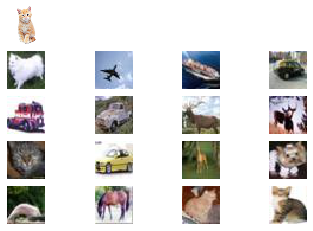

In [13]:

# Get query image path
image_path = './cat.jpg'

# Load the classifier, class names, scaler, number of clusters and vocabulary
im_features, image_paths, idf, numWords, voc = joblib.load("bof.pkl")

# Create feature extraction and keypoint detector objects
sift = cv2.xfeatures2d.SIFT_create()

# List where all the descriptors are stored
des_list = []

im = cv2.imread(image_path)
kpts, des = sift.detectAndCompute(im, None)

des_list.append((image_path, des))

# Stack all the descriptors vertically in a numpy array
descriptors = des_list[0][1]

#
test_features = np.zeros((1, numWords), "float32")
words, distance = vq(descriptors,voc)
for w in words:
    test_features[0][w] += 1

# Perform Tf-Idf vectorization and L2 normalization
test_features = test_features*idf
test_features = preprocessing.normalize(test_features, norm='l2')

score = np.dot(test_features, im_features.T)
rank_ID = np.argsort(-score)

# Visualize the results
figure()
gray()
subplot(5,4,1)
imshow(im[:,:,::-1])
axis('off')
for i, ID in enumerate(rank_ID[0][0:16]):
    img = Image.open(image_paths[ID])
    gray()
    subplot(5,4,i+5)
    imshow(img)
    axis('off')

show()

最上面一张是查询图像，后面的是搜索到的图像.

<!--  -->